In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import numpy as np

## Preparação dos dados

In [5]:
desmatamento = pd.read_csv('prodes_desmatamento.csv', sep=';', encoding='latin1')

In [6]:
desmatamento.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,1988,620,1510,60,2450,5140,6990,2340,290,1650,21050
1,1989,540,1180,130,1420,5960,5750,1430,630,730,17770
2,1990,550,520,250,1100,4020,4890,1670,150,580,13730
3,1991,380,980,410,670,2840,3780,1110,420,440,11030
4,1992,400,799,36,1135,4674,3787,2265,281,409,13786


In [7]:
#renomeando as colunas ano e amz legal
desmatamento = desmatamento.rename(columns={'Ano/Estados' : 'Ano', 'AMZ LEGAL' : 'Desmatamento'})

In [8]:
desmatamento = desmatamento[['Ano', 'Desmatamento']].dropna()

In [9]:
desmatamento = desmatamento[desmatamento['Desmatamento'].apply(lambda x: str(x).isdigit())]

In [10]:
desmatamento['Ano'] = desmatamento['Ano'].astype(int)
desmatamento['Desmatamento'] = desmatamento['Desmatamento'].astype(int)

In [11]:
desmatamento.set_index('Ano', inplace=True)

In [12]:
# Treinando modelo ARIMA
arima_model = ARIMA(desmatamento['Desmatamento'], order=(1, 1, 1))
arima_fit = arima_model.fit()

c:\Users\marco\OneDrive\Área de Trabalho\Projeto IA\Desmatamento-amazonia-modelo-preditivo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\marco\OneDrive\Área de Trabalho\Projeto IA\Desmatamento-amazonia-modelo-preditivo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\marco\OneDrive\Área de Trabalho\Projeto IA\Desmatamento-amazonia-modelo-preditivo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one

In [13]:
# previsão com ARIMA para os próximos 5 anos
futuro = 5
arima_forecast = arima_fit.forecast(steps=futuro)
anos_futuros = np.arange(desmatamento.index[-1] + 1, desmatamento.index[-1] + futuro + 1)

c:\Users\marco\OneDrive\Área de Trabalho\Projeto IA\Desmatamento-amazonia-modelo-preditivo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\marco\OneDrive\Área de Trabalho\Projeto IA\Desmatamento-amazonia-modelo-preditivo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
# regressão linear 
X = desmatamento.index.values.reshape(-1, 1)
Y = desmatamento['Desmatamento'].values
lin_reg = LinearRegression().fit(X, Y)

In [15]:
#previsão com regressão linear
lin_reg_forecast = lin_reg.predict(anos_futuros.reshape(-1, 1))

In [16]:
#Criar dataframe comparativo
df_comparativo = pd.DataFrame({
    'Ano': anos_futuros,
    'Previsao_ARIMA': arima_forecast,
    'Previsao_Linear': lin_reg_forecast
})

## Visualização dos dados

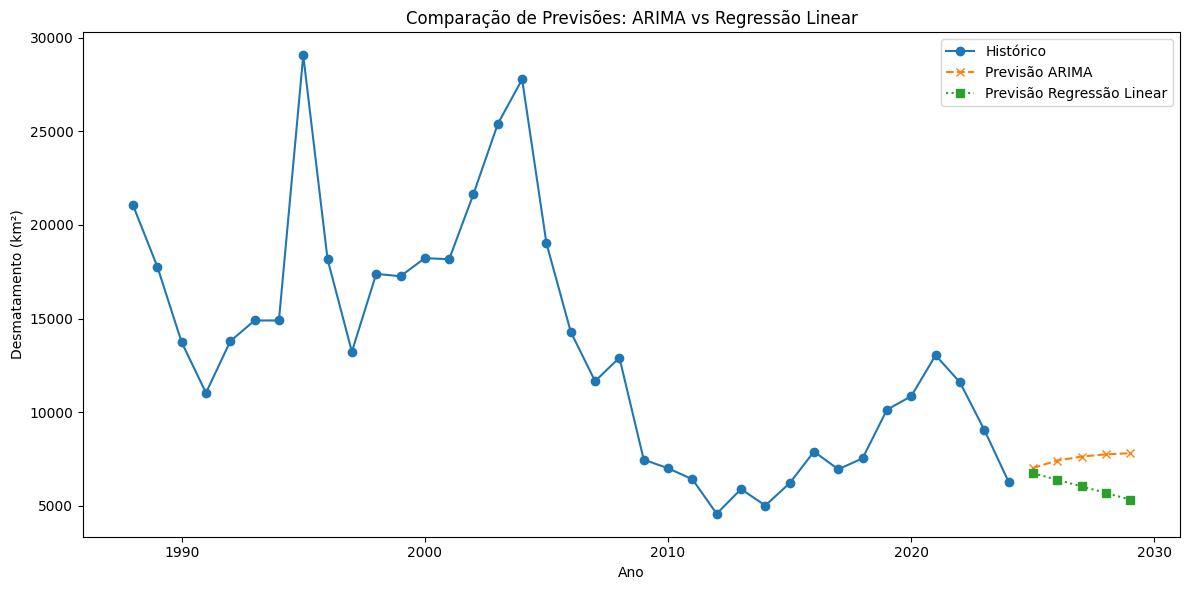

,Ano,Previsao_ARIMA,Previsao_Linear
37,2025,7016.982574,6740.500000
38,2026,7413.011713,6387.977240
39,2027,7628.159625,6035.454481
40,2028,7745.041490,5682.931721
41,2029,7808.539063,5330.408962


In [17]:
plt.figure(figsize=(12, 6))
plt.plot(desmatamento.index, desmatamento['Desmatamento'], label='Histórico', marker='o')
plt.plot(anos_futuros, arima_forecast, label='Previsão ARIMA', marker='x', linestyle='--')
plt.plot(anos_futuros, lin_reg_forecast, label='Previsão Regressão Linear', marker='s', linestyle=':')
plt.xlabel('Ano')
plt.ylabel('Desmatamento (km²)')
plt.title('Comparação de Previsões: ARIMA vs Regressão Linear')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()
df_comparativo